In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI/AAPL.csv')
df = df[['Close']]
dataset = df.values
training_data_len = int(np.ceil(len(dataset) * 0.8))

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(120, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(120, return_sequences=True))
model.add(LSTM(120, return_sequences=True))
model.add(LSTM(120, return_sequences=True))
model.add(LSTM(120, return_sequences=True))
model.add(LSTM(120, return_sequences=True))
model.add(LSTM(120, return_sequences=False))
model.add(Dense(60))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1)

8268/8268 [==============================] - 885s 106ms/step - loss: nan


# **Tạo dữ liệu kiểm tra**

In [ ]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **Dự đoán và đánh giá**

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print('Root Mean Squared Error:', rmse)

66/66 [==============================] - 11s 130ms/step
Root Mean Squared Error: nan


<ipython-input-26-75efb37854e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


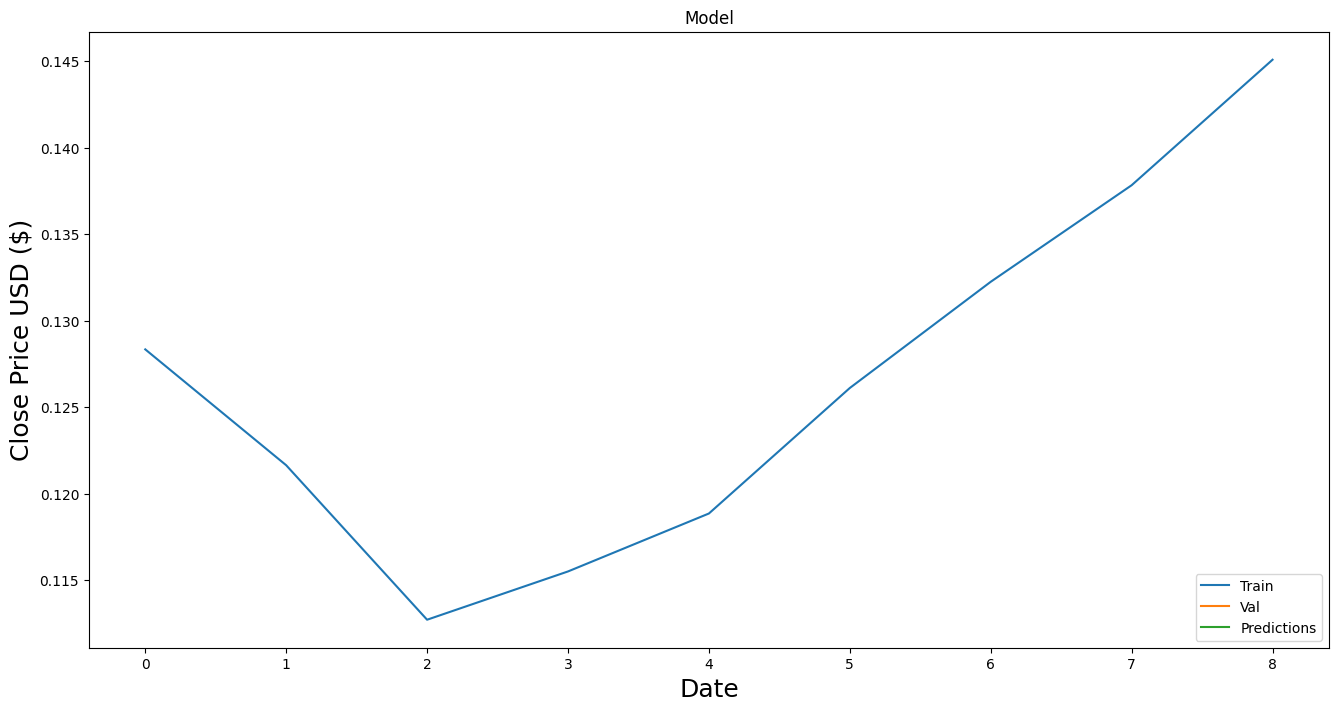

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
time_steps = 120
test_data = scaled_data[-time_steps:, :]
x_test = test_data.reshape((1, time_steps, 1))
predictions = model.predict(x_test)
next_day_predictions = scaler.inverse_transform(predictions)
print('Next day predicted stock price:', next_day_predictions)

1/1 [==============================] - 0s 63ms/step
Next day predicted stock price: [[nan]]
